<a href="https://colab.research.google.com/github/AHMEDPUCO/Container-VMs/blob/main/Containers_Vms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vagrantfile del cliente

In [ ]:
#Iniciamos configuración del vagrant con la version 2
Vagrant.configure("2") do |config|
  # Especificamos que la imagen de la caja que va a utilizar. La maquina virtual va a ser la mencionada.
  config.vm.box = "ubuntu/bionic64"
   #Utilizamos un script de shell para configurar que los comandos se ejecuten en secuencia.
  config.vm.provision "shell", inline: <<-SHELL
  #Actualizamos lista de paquetes disponibles.
  sudo apt update
  #Instalamos paquetes necesarios para instalar el “wrk”. build essential brinda herramientas básicas de compilación,
  #libssl-dev se utiliza para la construcción de programas ssl, git es una herramienta de control de versión y unzip de descompresión.
    sudo apt install -y build-essential libssl-dev git unzip
    #Clonamos el repositorio de github en el directorio temporal
    git clone https://github.com/wg/wrk.git /tmp/wrk
    # Nos pasamos al directorio recién creado.
    cd /tmp/wrk
    #Compila el codigo fuente de wrk y produce el ejecutable
    make
    # Movemos el ejecutable wrk a un nuevo directorio para que este disponible globalmente.
    sudo mv /tmp/wrk/wrk /usr/local/bin/wrk
  SHELL
end



VagrantFile del servidor

In [ ]:
Vagrant.configure("2") do |config|
  config.vm.box = "ubuntu/bionic64"

  config.vm.provision "shell", inline: <<-SHELL
    # Update package index
    sudo apt-get update

    # Instalamos NGINX
    sudo apt-get install -y nginx

    # Inicializamos NGINX
    sudo systemctl start nginx

    # Configura Nginx para que se inicia de manera automática.
    sudo systemctl enable nginx

    # Creación de un documento HTML
    echo "<html><body><h1>Hello, this is a simple web page served by NGINX!</h1><h2>~Using Vagrant</h2></body></html>" | sudo tee /var/www/html/index.html
  SHELL
  #Establecemos un reenvio de puertos para que estén accesibles desde el host.
  config.vm.network "forwarded_port", guest: 80, host: 8080
end



Dockerfile del servidor

In [ ]:
# Especificamos la imagen NGINX como imagen base
FROM nginx

# Copiamos el archivo de configuración personalizado NGINX
COPY nginx.conf /etc/nginx/nginx.conf

# Copia un archivo html al directorio indicado
COPY index.html /usr/share/nginx/html/index.html

#Exponemos el puerto 8080 al mundo exterior
EXPOSE 8080

# Inicializar NGINX cuando el contenedor se inicie.
CMD ["nginx", "-g", "daemon off;"]



# Comando utilizado para realizar la prueba


# Vagrant


wrk -t4 -c100 -d180s http://192.168.10.80:8080



El comando representa un tipo de prueba de carga que permite evaluar el rendimiento y la capacidad del servidor web para manejar múltiples conexiones concurrentes durante un periodo de tiempo.


*   -t4 indica que se van a realizar 4 solicitudes simultáneas al servidor.
*   -c100 configura "wrk" para mantener un 100 conexiones simúltaneas abiertas durante la prueba
*  -d180s indica cuanto va a durar la prueba
*   http://192.168.10.80:8080 indica a "wrk" que realice las solicitudes contra el servidor web que esta escuchando la ip y el puerto indicado. Tomar en cuenta que la ip utilizada debe ser del computador del cliente.









# Docker

1)docker build -t docker_server.

2)docker run --rm -d -p 8888:8888 --name docker_server docker_server


1.  El primer comando se encarga de crear una imagen Docker a partir de las instrucciones indicadas en el docker file. A esta imagen le asigna el nombre "docker_server"
2.  El segundo comando realiza la creación y ejecución de un contenedor utilizando la imagen previamente construida. El contenedor funciona en segundo plano, estableciendo una correspondencia entre el puerto 8888 del sistema host y el puerto 8888 del contenedor. Además, se configura para ser eliminado automáticamente una vez que se detiene.



# Análisis de las diferencias


# Servidor web maquina virtual


Antes de realizar las pruebas

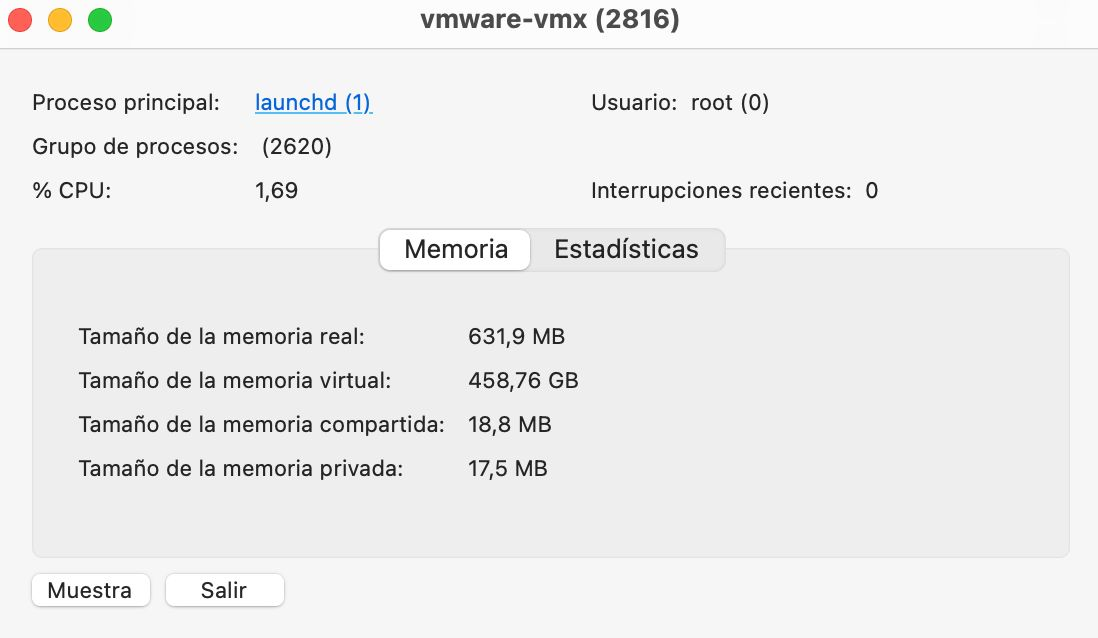

In [11]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/VAGRANT ANTES.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))


Después de realizar las pruebas

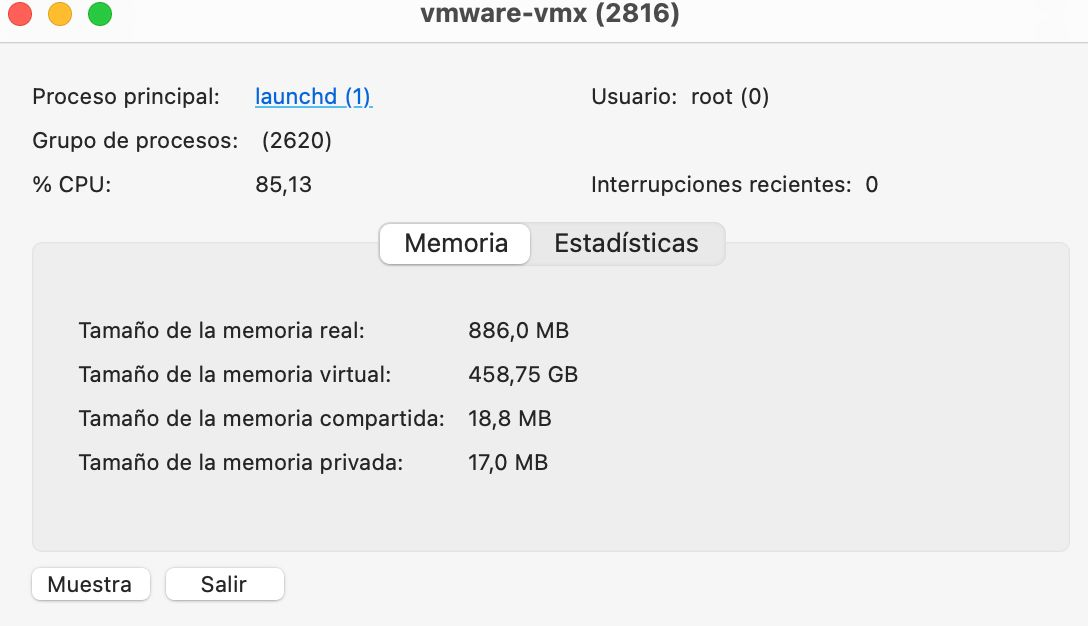

In [12]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/vagrant despues.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))

# Servidor web contenedor

Antes de realizar las pruebas

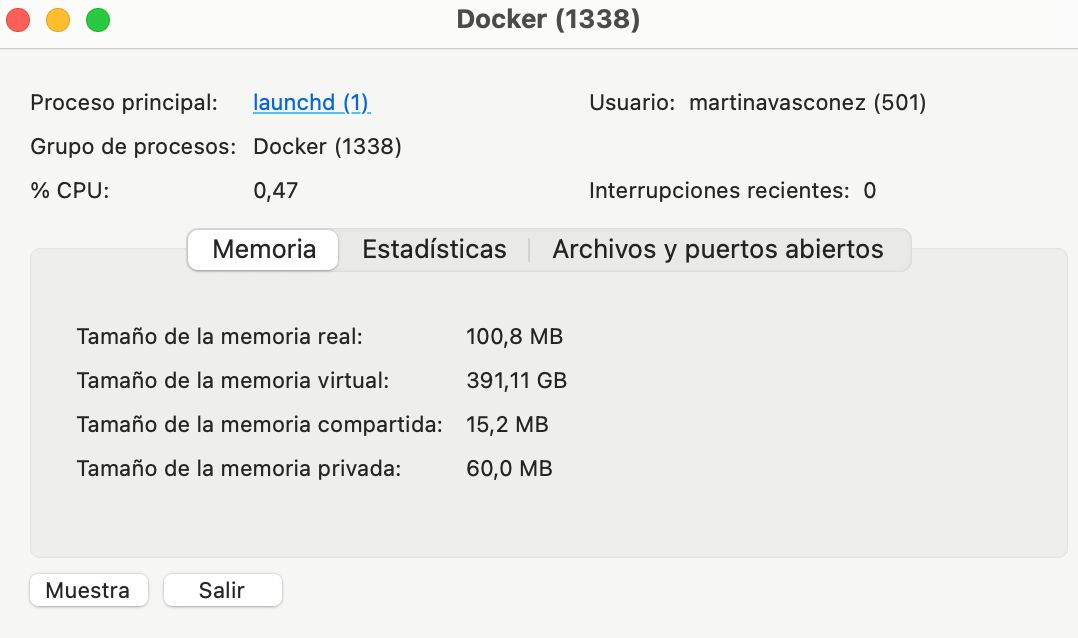

In [13]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/DOCKER ANTES.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))

Después de realizar las pruebas

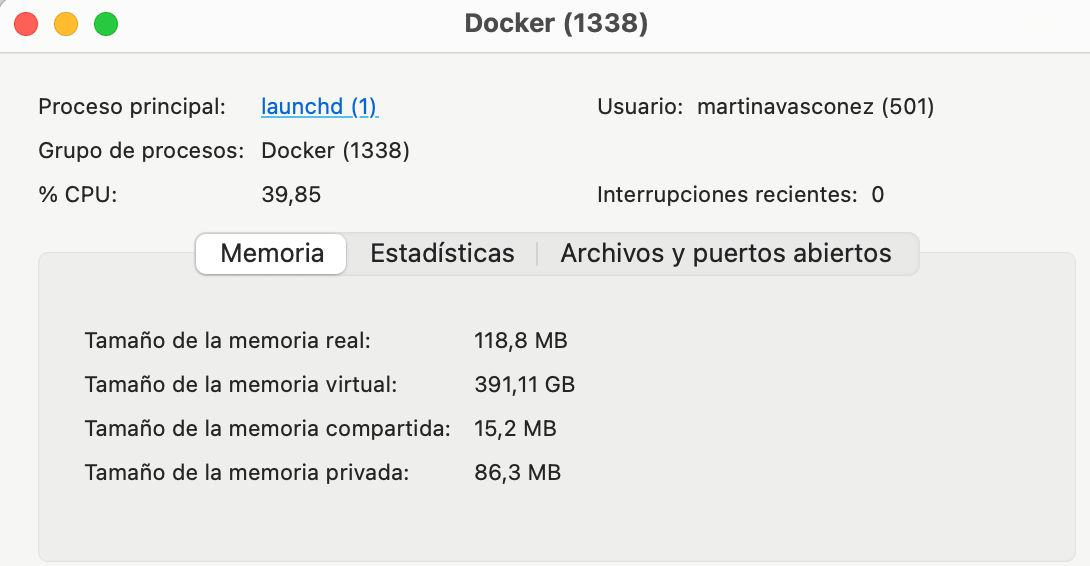

In [17]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/Docker Despues.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))

#Cliente

Maquina virtual

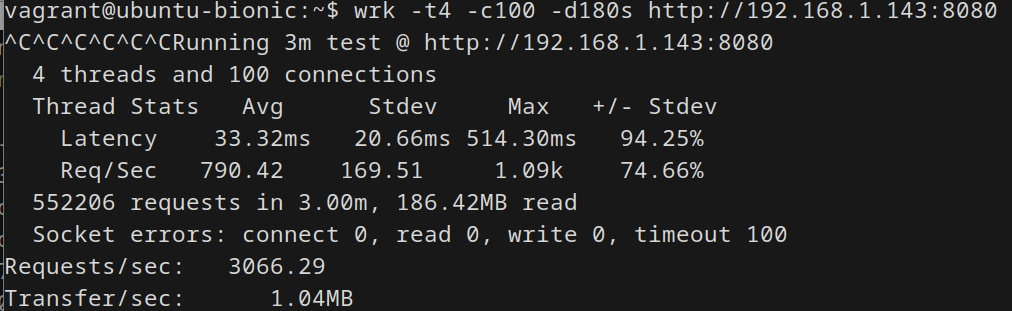

In [15]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/CLIENTE VAGRANT.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))

Contenedor

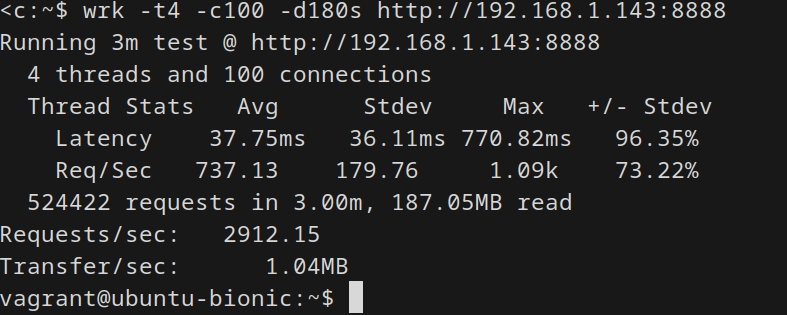

In [16]:
# @title
from IPython.display import Image, display

# Ruta de la imagen en tu computadora
ruta_imagen = "/CLIENTE CONTENEDOR.jpg"
# Mostrar la imagen con un título
display(Image(filename=ruta_imagen, width=500))

#Análisis

Las diferencias más notables en el computador host se reflejan principalmente en la utilización de la memoria real y el porcentaje de CPU. En el contexto de las máquinas virtuales, se observa que antes de realizar las pruebas, el uso de la CPU es bajo. Sin embargo, al iniciar las pruebas, se evidencia un significativo aumento del 80% en el porcentaje de CPU. Esta variación se atribuye a que las máquinas virtuales, al emular sistemas operativos completos, demandan una mayor cantidad de recursos y memoria para llevar a cabo esta tarea; el hipervisor permite que la máquina virtual acceda a los recursos del computador para ser lanzada.

En contraste con esta situación, al analizar los contenedores, se observa un escenario opuesto. Incluso antes de realizar las pruebas, los recursos utilizados son notablemente inferiores y el aumento en la memoria es más moderado en comparación con las máquinas virtuales. Esta disparidad se explica por el hecho de que los contenedores aprovechan el kernel del sistema operativo del host desde el principio. Dicha arquitectura más liviana y eficiente facilita un uso más eficaz de los recursos, explicando la menor demanda de memoria en comparación con las máquinas virtuales.

En consecuencia, se recomendaría el uso de contenedores, especialmente a través de tecnologías como Docker, en situaciones donde se busque optimizar el consumo de recursos y memoria del CPU. Los contenedores proporcionan un entorno más eficiente y ligero al aprovechar el kernel del sistema operativo del host desde el inicio, lo que resulta en una menor sobrecarga y una utilización más efectiva de los recursos del sistema.


En el análisis del rendimiento desde la perspectiva del cliente, se llevaron a cabo diversas pruebas, de las cuales se obtuvieron los siguientes resultados. Se observó que el servidor web ejecutado mediante Docker registró un mayor número de solicitudes por segundo en comparación con la máquina virtual. Este fenómeno puede atribuirse a la naturaleza más rápida de inicio de los contenedores en comparación con las máquinas virtuales, así como a un menor overhead. En consecuencia, los contenedores pueden procesar un mayor volumen de solicitudes en un periodo de tiempo más reducido.

En el análisis de latencia, observamos que en ambos casos se mantienen dentro del mismo rango; sin embargo, la máquina virtual exhibe una latencia inferior en comparación con el contenedor. Esta diferencia se atribuye al hecho de que al asignar una mayor cantidad de recursos a la máquina virtual, se logra un rendimiento mejorado, resultando en una menor latencia. Es fundamental tener en cuenta que existen diversos factores que pueden influir en la latencia y que esta observación específica puede estar relacionada con la asignación y optimización de recursos.



